<a href="https://colab.research.google.com/github/CHIRANJEET12/Machine-Learning/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression


In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


In [71]:
df = fetch_california_housing()
dataset = pd.DataFrame(df.data, columns=df.feature_names)

In [72]:
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


 Interpretation: Values close to 1 or -1 show strong relationships. Look for features highly correlated with MedInc or AveRooms, etc.

In [103]:
correlation = dataset.corr()

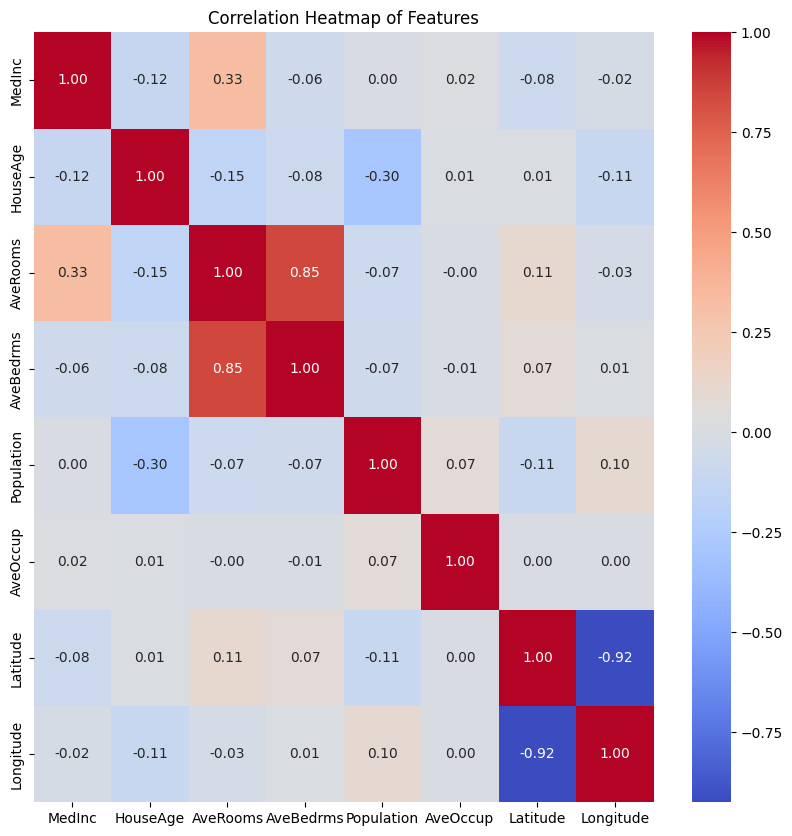

In [109]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

Interpretation: Look at how each feature visually relates to another — like whether MedInc rises with AveRooms.

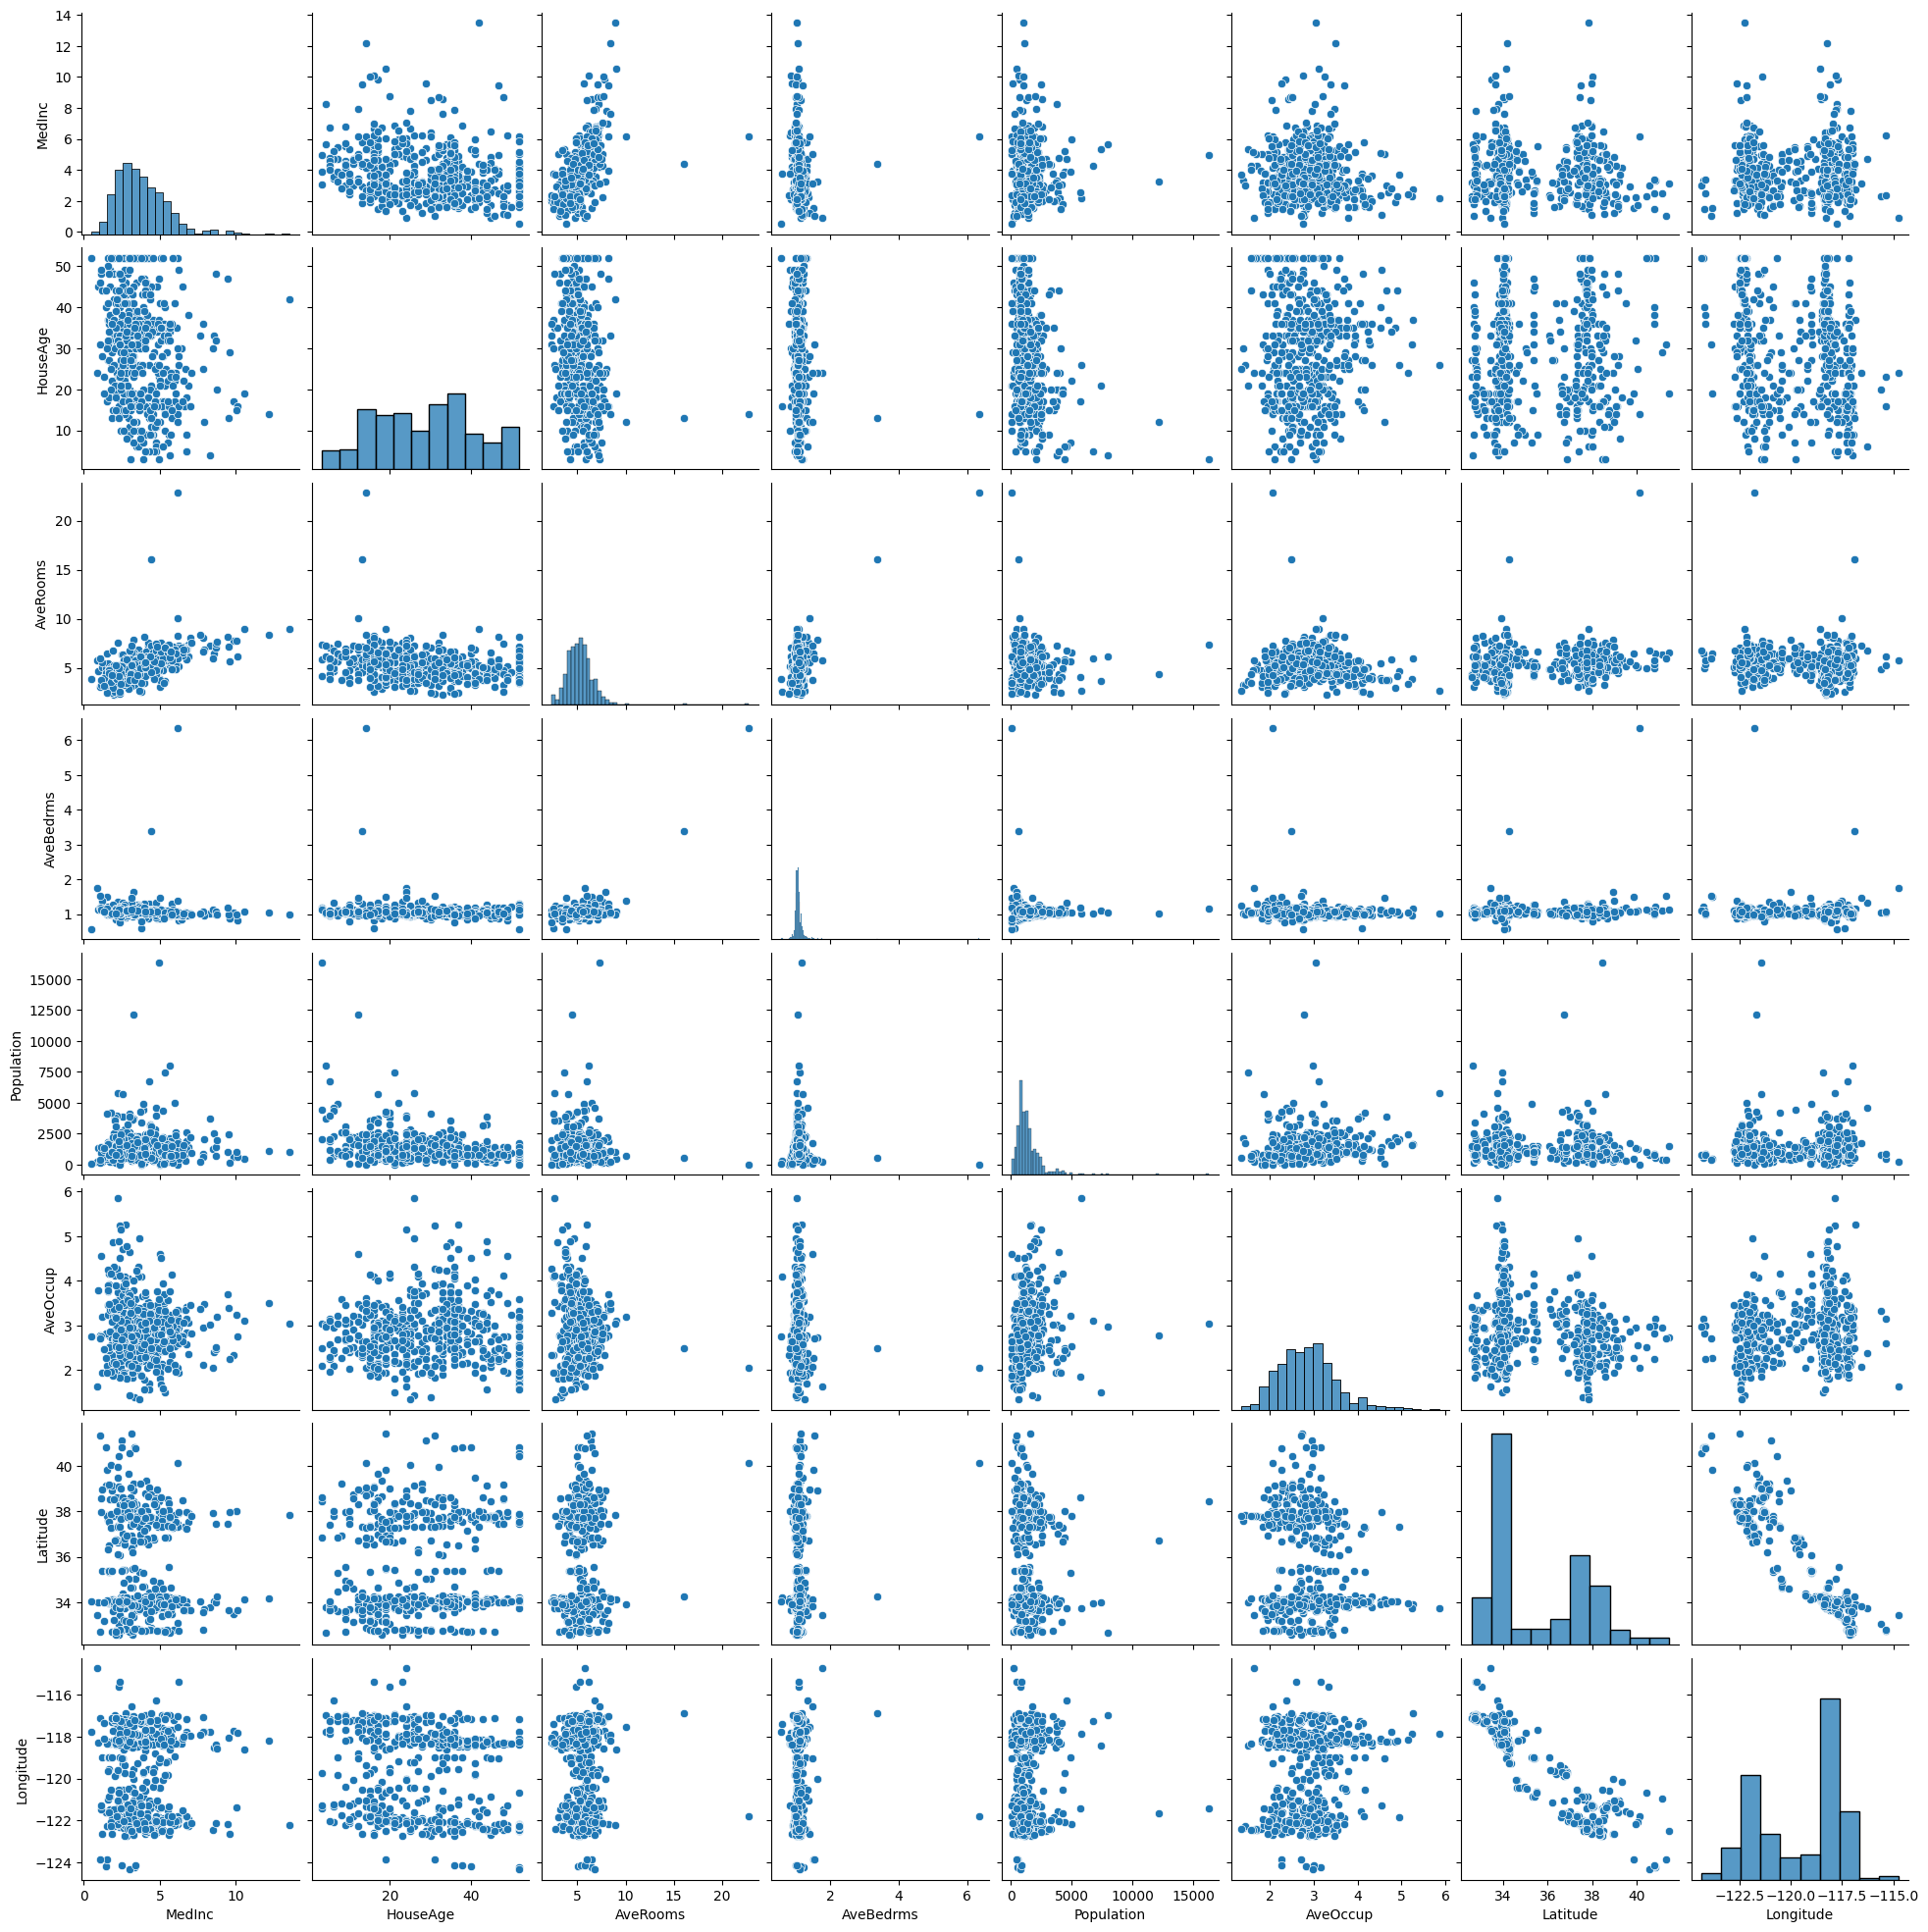

In [110]:
sns.pairplot(dataset.sample(500))
plt.show()

Compare distributions side-by-side.


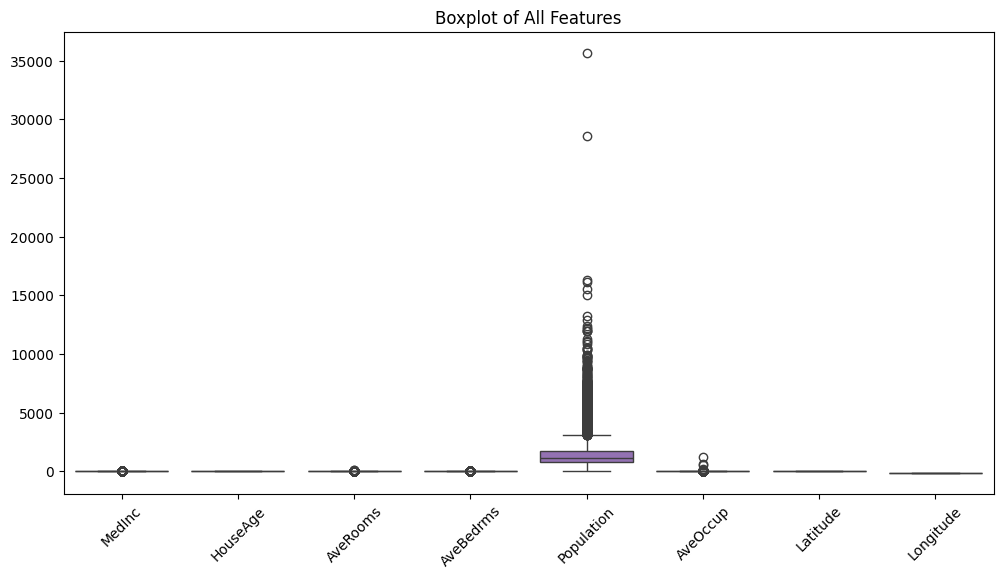

In [111]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=dataset)
plt.xticks(rotation=45)
plt.title("Boxplot of All Features")
plt.show()

Plot histograms of each feature to compare value distribution

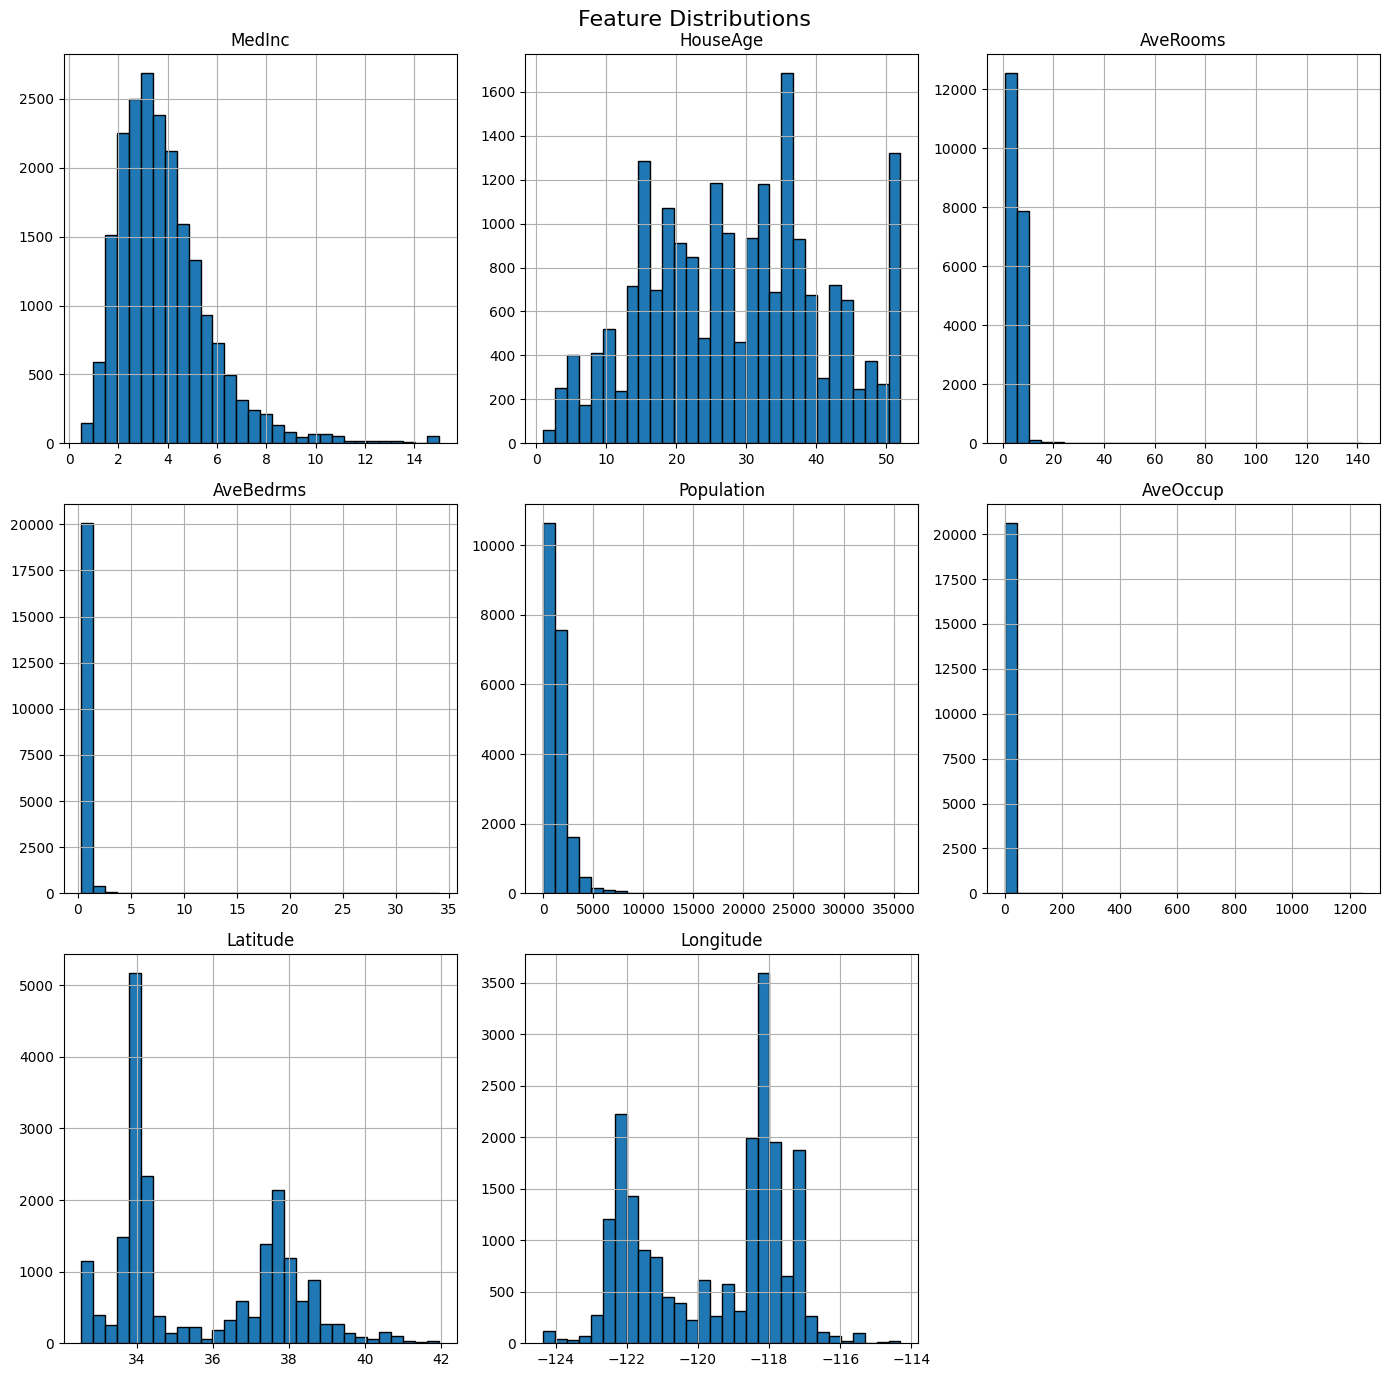

In [113]:
dataset.hist(bins=30, figsize=(14, 14), edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

Scatter Plot (Two Features)
For specific comparisons, like between MedInc and AveRooms:

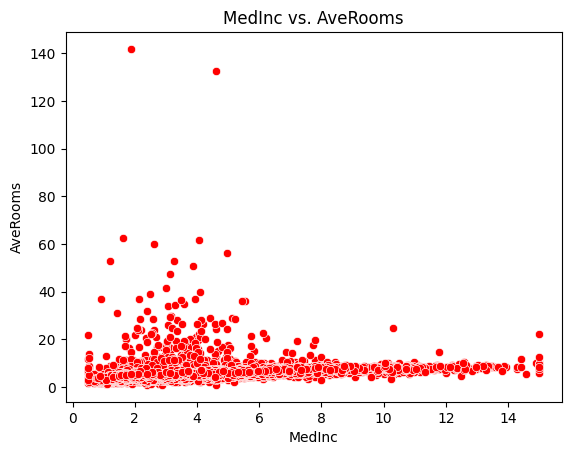

In [117]:
sns.scatterplot(x='MedInc', y='AveRooms', data=dataset, color='red')
plt.title("MedInc vs. AveRooms")
plt.show()

In [73]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [74]:
dataset.AveBedrms

,AveBedrms
0,1.023810
1,0.971880
2,1.073446
3,1.073059
4,1.081081
...,...
20635,1.133333
20636,1.315789
20637,1.120092
20638,1.171920


In [75]:
dataset.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24


In [76]:
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [77]:
dataset.mean()

,0
MedInc,3.870671
HouseAge,28.639486
AveRooms,5.429000
AveBedrms,1.096675
Population,1425.476744
AveOccup,3.070655
Latitude,35.631861
Longitude,-119.569704


Independent and Dependeent features

In [78]:
X = dataset
y = df.target


train test and split

In [101]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

standardizing the dataset for good and optimized output model

In [80]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# scalar.inverse_transform(X_train)

cross validation

In [87]:
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [89]:
mse = cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
print("Cross-validated MSE (negative):", mse)
print("Mean MSE:", np.mean(mse))

Cross-validated MSE (negative): [-0.56799593 -0.52918854 -0.48456478 -0.51627013 -0.54833859 -0.47884524
 -0.47828648 -0.55465187 -0.55647389 -0.54248888]
Mean MSE: -0.5257104326777


prediction

In [91]:
reg_pred = regression.predict(X_test)
reg_pred

array([0.72604907, 1.76743383, 2.71092161, ..., 2.07465531, 1.57371395,
       1.82744133])

compare it with truth value (y_test)

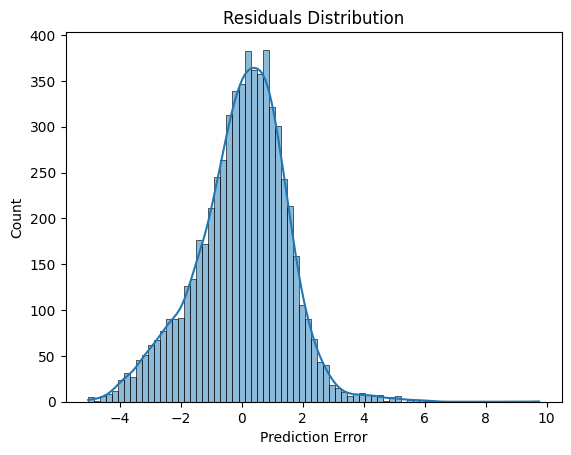

In [99]:
sns.histplot(reg_pred - y_test, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Prediction Error")
plt.show()

In [102]:
score = r2_score(y_test, reg_pred)
print("R² Score:", score)

R² Score: 0.5957702326061664
